# Digital Kesehatan

## Problem
Data yang akan dianalisa didapatkan dari pasien dimulai dari administrasi, hasil pemeriksaan, monitoring dalam rawat inap maupun rawat jalan, tracking asuransi, estimasi nominal biaya, pembayaran dan pasien kembali pulih. Data tersebut terpusat dalam satu server. Data tersebut dapat divisualisasikan berbagai macam summary sehingga pasien mendapatkan transparansi informasi serta perusahaan mendapatkan insight untuk evaluasi pelayanan.

## Business Problem

## Data Preparation

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

### Read dataframe

In [2]:
df = pd.read_csv("csv/hasil_dummy.csv")
df.head()

id     date_in    date_out branch hospital_care  drug_quantity  \
0  30591  2020-01-01  2020-01-03   RSMD    Rawat Inap              4   
1  46456  2020-01-01  2020-01-05   RSMA    Rawat Inap              1   
2  99188  2020-01-01  2020-01-01   RSMD   Rawat Jalan              5   
3  23001  2020-01-01  2020-01-05   RSMA    Rawat Inap              2   
4  29319  2020-01-01  2020-01-02   RSMS    Rawat Inap              3   

   admin_price      cogs   payment             review  ...  \
0        50000  13719597  Asuransi             Netral  ...   
1        50000  14625784   Pribadi  Sangat Tidak Puas  ...   
2        50000   3859519   Pribadi        Sangat Puas  ...   
3        50000   6086762  Asuransi             Netral  ...   
4        50000   3003078  Asuransi  Sangat Tidak Puas  ...   

   doctor_visit_price  room_price_total  food_price_total  \
0            900000.0            600000          240000.0   
1           1500000.0           1250000          550000.0   
2            300000.0                 0               0.0   
3           1500000.0           1500000          750000.0   
4            600000.0            600000          300000.0   

   surgery_price_total  lab_price_total  infus_price_total total_amount  \
0             15000000            90000           495000.0     17535000   
1             15000000           200000           825000.0     19485000   
2                    0            90000                0.0       990000   
3              4000000           150000           825000.0      8925000   
4                    0           200000           330000.0      2305000   

   revenue                  created_at is_DBD  
0  3815403  2024-05-02 09:28:45.585259  False  
1  4859216  2024-05-02 09:28:45.585265  False  
2 -2869519  2024-05-02 09:28:45.585267  False  
3  2838238  2024-05-02 09:28:45.585268  False  
4  -698078  2024-05-02 09:28:45.585268  False  

[5 rows x 43 columns]

## Exploratory Data Analysis (EDA)

In [3]:
df.sample(5)

id     date_in    date_out branch hospital_care  drug_quantity  \
1330  90354  2020-07-01  2020-07-06   RSMA    Rawat Inap              2   
1824  95987  2020-09-09  2020-09-13   RSMA    Rawat Inap              2   
8486  27360  2023-07-27  2023-07-27   RSMS   Rawat Jalan              5   
3861  50836  2021-07-12  2021-07-12   RSMA   Rawat Jalan              2   
8810  16974  2023-09-15  2023-09-16   RSMD    Rawat Inap              4   

      admin_price      cogs  payment             review  ...  \
1330        50000   6638839  Pribadi  Sangat Tidak Puas  ...   
1824        50000  13949994  Pribadi             Netral  ...   
8486        50000   2179949  Pribadi               Puas  ...   
3861        50000   4118071  Pribadi        Sangat Puas  ...   
8810        50000   9654636  Pribadi             Netral  ...   

      doctor_visit_price  room_price_total  food_price_total  \
1330           1800000.0            900000          300000.0   
1824           1500000.0           1250000          550000.0   
8486            300000.0                 0               0.0   
3861            250000.0                 0               0.0   
8810            500000.0            400000          160000.0   

      surgery_price_total  lab_price_total  infus_price_total total_amount  \
1330              4000000            80000           990000.0      8200000   
1824             15000000            90000           825000.0     19365000   
8486                    0            90000                0.0       815000   
3861                    0            80000                0.0       480000   
8810              8000000                0           330000.0      9740000   

      revenue                  created_at is_DBD  
1330  1561161  2024-05-02 09:28:45.585995  False  
1824  5415006  2024-05-02 09:28:45.586248  False  
8486 -1364949  2024-05-02 09:28:45.589729  False  
3861 -3638071  2024-05-02 09:28:45.587286  False  
8810    85364  2024-05-02 09:28:45.589970  False  

[5 rows x 43 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9474 non-null   int64  
 1   date_in              9474 non-null   object 
 2   date_out             9474 non-null   object 
 3   branch               9474 non-null   object 
 4   hospital_care        9474 non-null   object 
 5   drug_quantity        9474 non-null   int64  
 6   admin_price          9474 non-null   int64  
 7   cogs                 9474 non-null   int64  
 8   payment              9474 non-null   object 
 9   review               9474 non-null   object 
 10  patient_id           9474 non-null   int64  
 11  room_id              9474 non-null   int64  
 12  drug_id              9474 non-null   int64  
 13  doctor_id            9474 non-null   int64  
 14  surgery_id           9474 non-null   int64  
 15  lab_id               9474 non-null   i

In [5]:
# Convert date objects to dates
df['date_in'] = pd.to_datetime(df['date_in'])
df['date_out'] = pd.to_datetime(df['date_out'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9474 non-null   int64         
 1   date_in              9474 non-null   datetime64[ns]
 2   date_out             9474 non-null   datetime64[ns]
 3   branch               9474 non-null   object        
 4   hospital_care        9474 non-null   object        
 5   drug_quantity        9474 non-null   int64         
 6   admin_price          9474 non-null   int64         
 7   cogs                 9474 non-null   int64         
 8   payment              9474 non-null   object        
 9   review               9474 non-null   object        
 10  patient_id           9474 non-null   int64         
 11  room_id              9474 non-null   int64         
 12  drug_id              9474 non-null   int64         
 13  doctor_id            9474 non-nul

In [7]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Missing Values
id                        0
date_in                   0
date_out                  0
branch                    0
hospital_care             0
drug_quantity             0
admin_price               0
cogs                      0
payment                   0
review                    0
patient_id                0
room_id                   0
drug_id                   0
doctor_id                 0
surgery_id                0
lab_id                    0
patient_name              0
gender                    0
age                       0
room_type              1573
food_price             1573
room_price             1573
drug_brand                0
drug_type                 0
drug_price                0
doctor                    0
doctor_price              0
surgery                3573
surgery_price          3573
lab                    1620
lab_price              1620
drug_price_total          0
days_diff                 0
doctor_visit_price        0
room_price_total          0
food_

In [8]:
# Data Duplicate
df.duplicated().sum()

0

In [9]:
# Grouping columns by data type
cats = []
nums = []
temps = []

for column, dtype in df.dtypes.items():
    if dtype == 'object' or dtype == 'bool':
        cats.append(column)
    elif dtype == 'int64' or dtype == 'float64':
        nums.append(column)
    elif dtype == 'datetime64[ns]':
        temps.append(column)

# Display the grouped columns
print("Categorical columns:", cats)
print("Numerical columns:", nums)
print("Temporal columns:", temps)


Categorical columns: ['branch', 'hospital_care', 'payment', 'review', 'patient_name', 'gender', 'room_type', 'drug_brand', 'drug_type', 'doctor', 'surgery', 'lab', 'is_DBD']
Numerical columns: ['id', 'drug_quantity', 'admin_price', 'cogs', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'age', 'food_price', 'room_price', 'drug_price', 'doctor_price', 'surgery_price', 'lab_price', 'drug_price_total', 'days_diff', 'doctor_visit_price', 'room_price_total', 'food_price_total', 'surgery_price_total', 'lab_price_total', 'infus_price_total', 'total_amount', 'revenue']
Temporal columns: ['date_in', 'date_out', 'created_at']


In [10]:
#Statistik Deskriptif kolom numerikal
df[nums].describe()

id  drug_quantity  admin_price          cogs   patient_id  \
count   9474.000000    9474.000000       9474.0  9.474000e+03  9474.000000   
mean   55248.223137       2.988600      50000.0  7.620927e+06  4737.500000   
std    25759.764978       1.411852          0.0  4.879623e+06  2735.052559   
min    10001.000000       1.000000      50000.0  1.000452e+06     1.000000   
25%    33103.000000       2.000000      50000.0  3.642624e+06  2369.250000   
50%    55447.000000       3.000000      50000.0  6.267770e+06  4737.500000   
75%    77456.000000       4.000000      50000.0  1.109500e+07  7105.750000   
max    99998.000000       5.000000      50000.0  1.749944e+07  9474.000000   

           room_id      drug_id    doctor_id   surgery_id       lab_id  ...  \
count  9474.000000  9474.000000  9474.000000  9474.000000  9474.000000  ...   
mean      2.101119     6.530716     3.010661     1.239814     2.483323  ...   
std       1.377272     3.442636     1.416523     1.156093     1.711970  ...   
min       0.000000     1.000000     1.000000     0.000000     0.000000  ...   
25%       1.000000     4.000000     2.000000     0.000000     1.000000  ...   
50%       2.000000     7.000000     3.000000     1.000000     2.000000  ...   
75%       3.000000    10.000000     4.000000     2.000000     4.000000  ...   
max       4.000000    12.000000     5.000000     3.000000     5.000000  ...   

       drug_price_total    days_diff  doctor_visit_price  room_price_total  \
count       9474.000000  9474.000000        9.474000e+03      9.474000e+03   
mean      206276.124129     3.338400        1.015870e+06      7.472609e+05   
std       133173.520244     1.971642        5.012932e+05      4.917391e+05   
min        40000.000000     0.000000        2.500000e+05      0.000000e+00   
25%       100000.000000     2.000000        6.000000e+05      4.000000e+05   
50%       160000.000000     3.000000        9.000000e+05      7.500000e+05   
75%       250000.000000     5.000000        1.500000e+06      1.200000e+06   
max       550000.000000     6.000000        1.800000e+06      1.800000e+06   

       food_price_total  surgery_price_total  lab_price_total  \
count       9474.000000         9.474000e+03      9474.000000   
mean      323113.785096         5.555204e+06    118739.180916   
std       238770.811460         5.632277e+06     71016.554775   
min            0.000000         0.000000e+00         0.000000   
25%       150000.000000         0.000000e+00     80000.000000   
50%       300000.000000         4.000000e+06     90000.000000   
75%       480000.000000         8.000000e+06    195000.000000   
max       900000.000000         1.500000e+07    200000.000000   

       infus_price_total  total_amount       revenue  
count        9474.000000  9.474000e+03  9.474000e+03  
mean       550835.972134  8.567299e+06  9.463725e+05  
std        325320.989704  6.259934e+06  2.319117e+06  
min             0.000000  3.400000e+05 -4.579823e+06  
25%        330000.000000  3.030000e+06 -7.092005e+05  
50%        495000.000000  7.730000e+06  1.073649e+06  
75%        825000.000000  1.246500e+07  2.615005e+06  
max        990000.000000  2.129000e+07  7.465913e+06  

[8 rows x 27 columns]

In [11]:
# Statistik deskriptif kolom kategorikal
df[cats].describe()

branch hospital_care  payment       review  patient_name     gender  \
count    9474          9474     9474         9474          9474       9474   
unique      3             2        2            5          9327          2   
top      RSMS    Rawat Inap  Pribadi  Sangat Puas  Rahmi Marbun  Perempuan   
freq     3205          7901     5515         1948             3       4773   

       room_type drug_brand drug_type     doctor surgery       lab is_DBD  
count       7901       9474      9474       9474    5901      7854   9474  
unique         4         12         4          5       3         5      2  
top      Kelas 3   Tramadol   Vitamin  Kandungan   Kecil  Serologi  False  
freq        2044        854      2407       1926    2057      1617   8935

In [12]:
# Statistik deskriptif kolom temporal
df[temps].describe()

date_in                       date_out  \
count                           9474                           9474   
mean   2021-12-08 16:28:52.742241792  2021-12-11 04:35:15.769474304   
min              2020-01-01 00:00:00            2020-01-01 00:00:00   
25%              2020-11-28 00:00:00            2020-11-30 06:00:00   
50%              2021-11-26 00:00:00            2021-11-29 00:00:00   
75%              2022-12-10 00:00:00            2022-12-13 00:00:00   
max              2023-12-31 00:00:00            2024-01-05 00:00:00   

                          created_at  
count                           9474  
mean   2024-05-02 09:28:45.587771392  
min       2024-05-02 09:28:45.585259  
25%    2024-05-02 09:28:45.586531072  
50%    2024-05-02 09:28:45.587736064  
75%    2024-05-02 09:28:45.589015808  
max       2024-05-02 09:28:45.590324

## Univariate Analysis

### Numerical columns

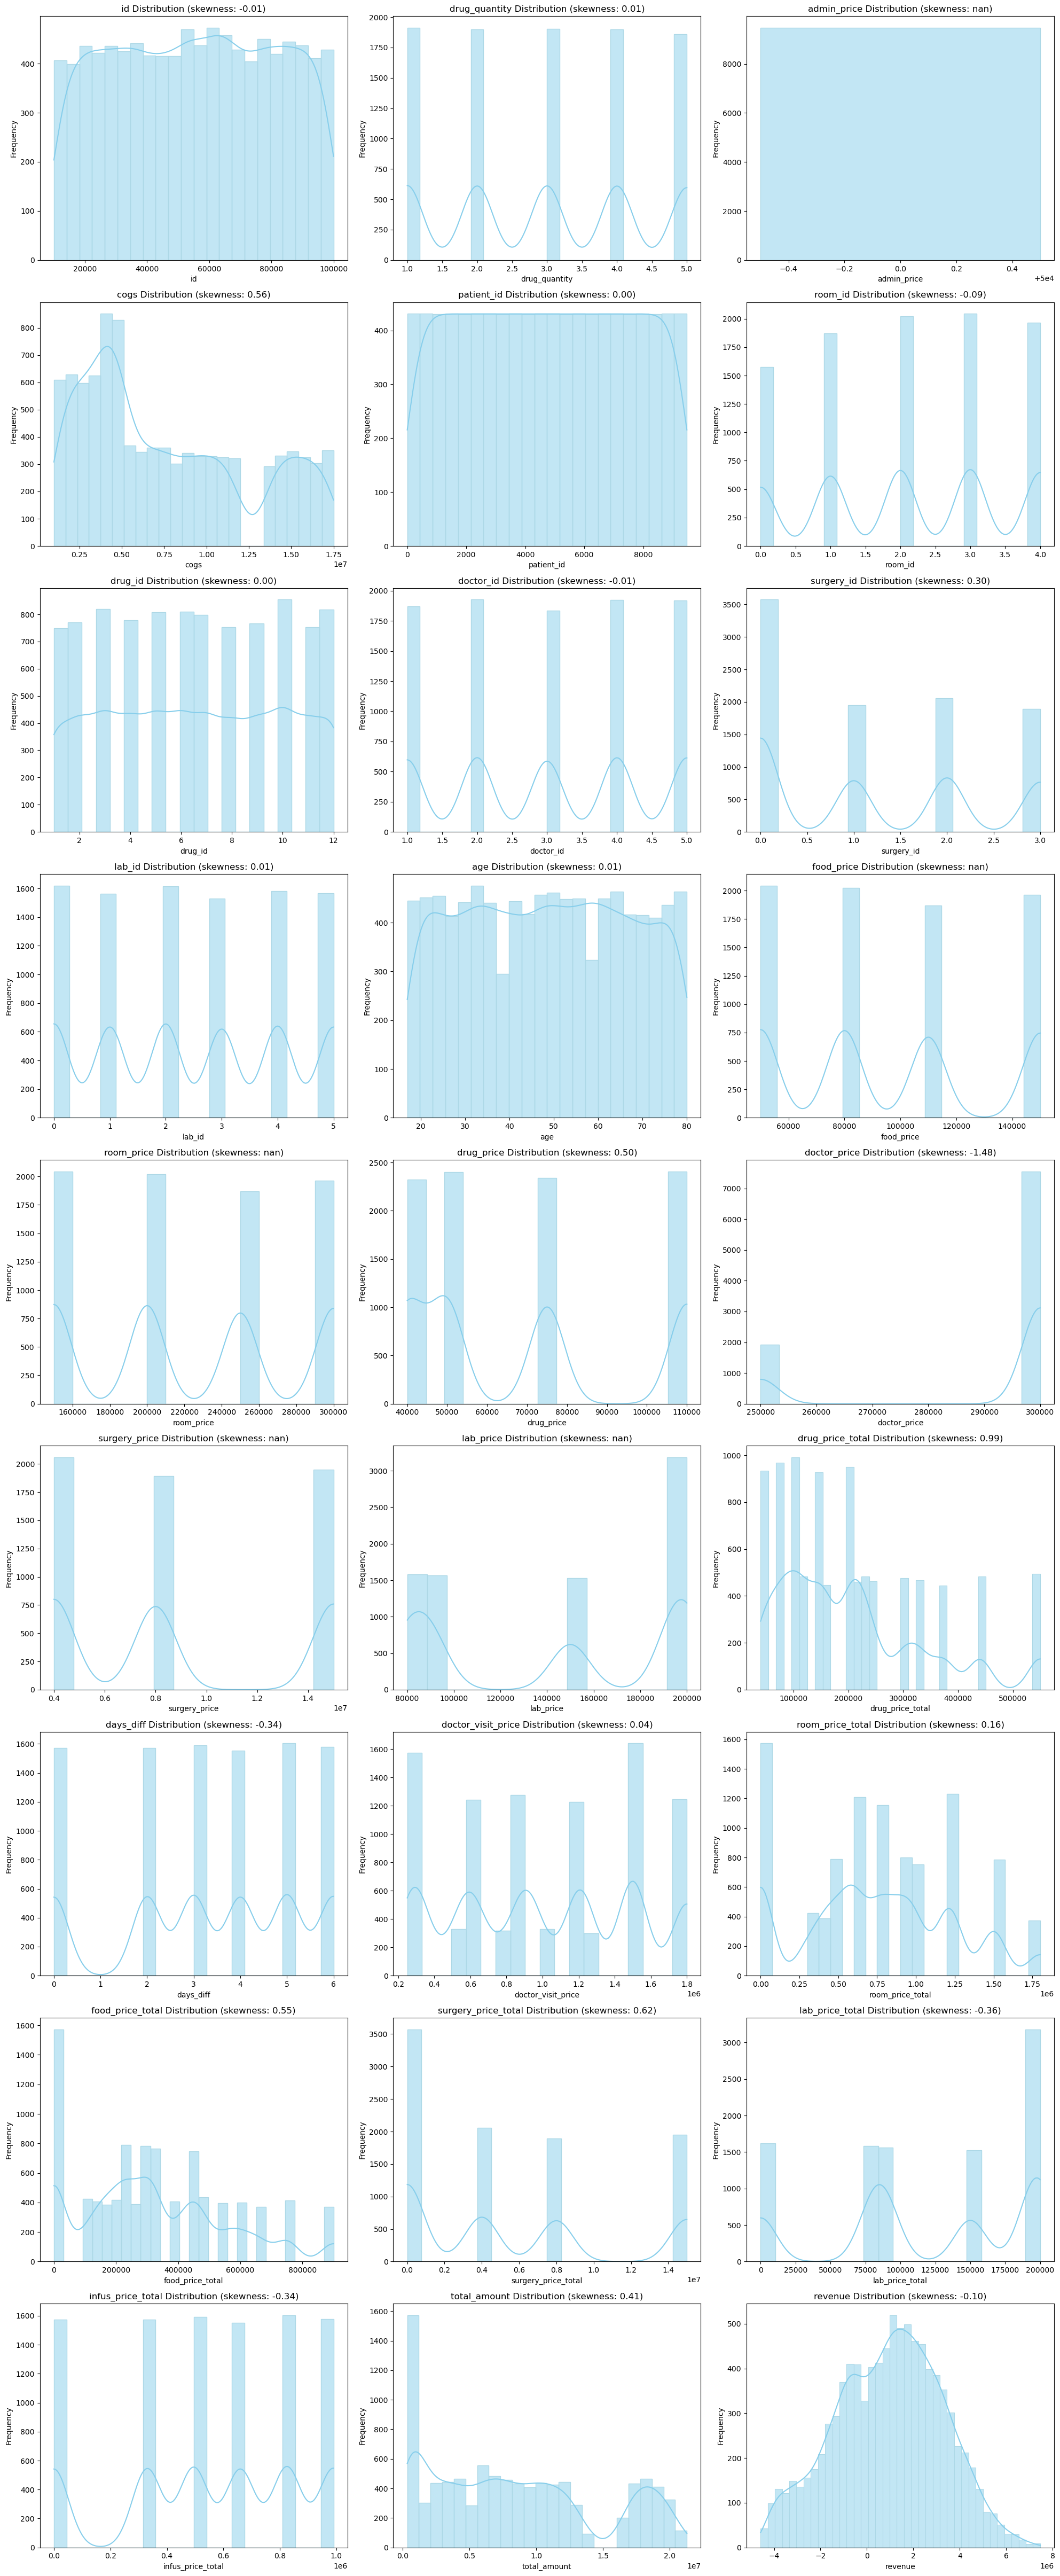

In [13]:
# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Loop through each numerical column
for i, column in enumerate(nums):
    ax = plt.subplot(grid[i])
    skewness = skew(df[column])
    sns.histplot(data=df, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=ax)
    ax.set_title(f'{column} Distribution (skewness: {skewness:.2f})')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Categorical columns

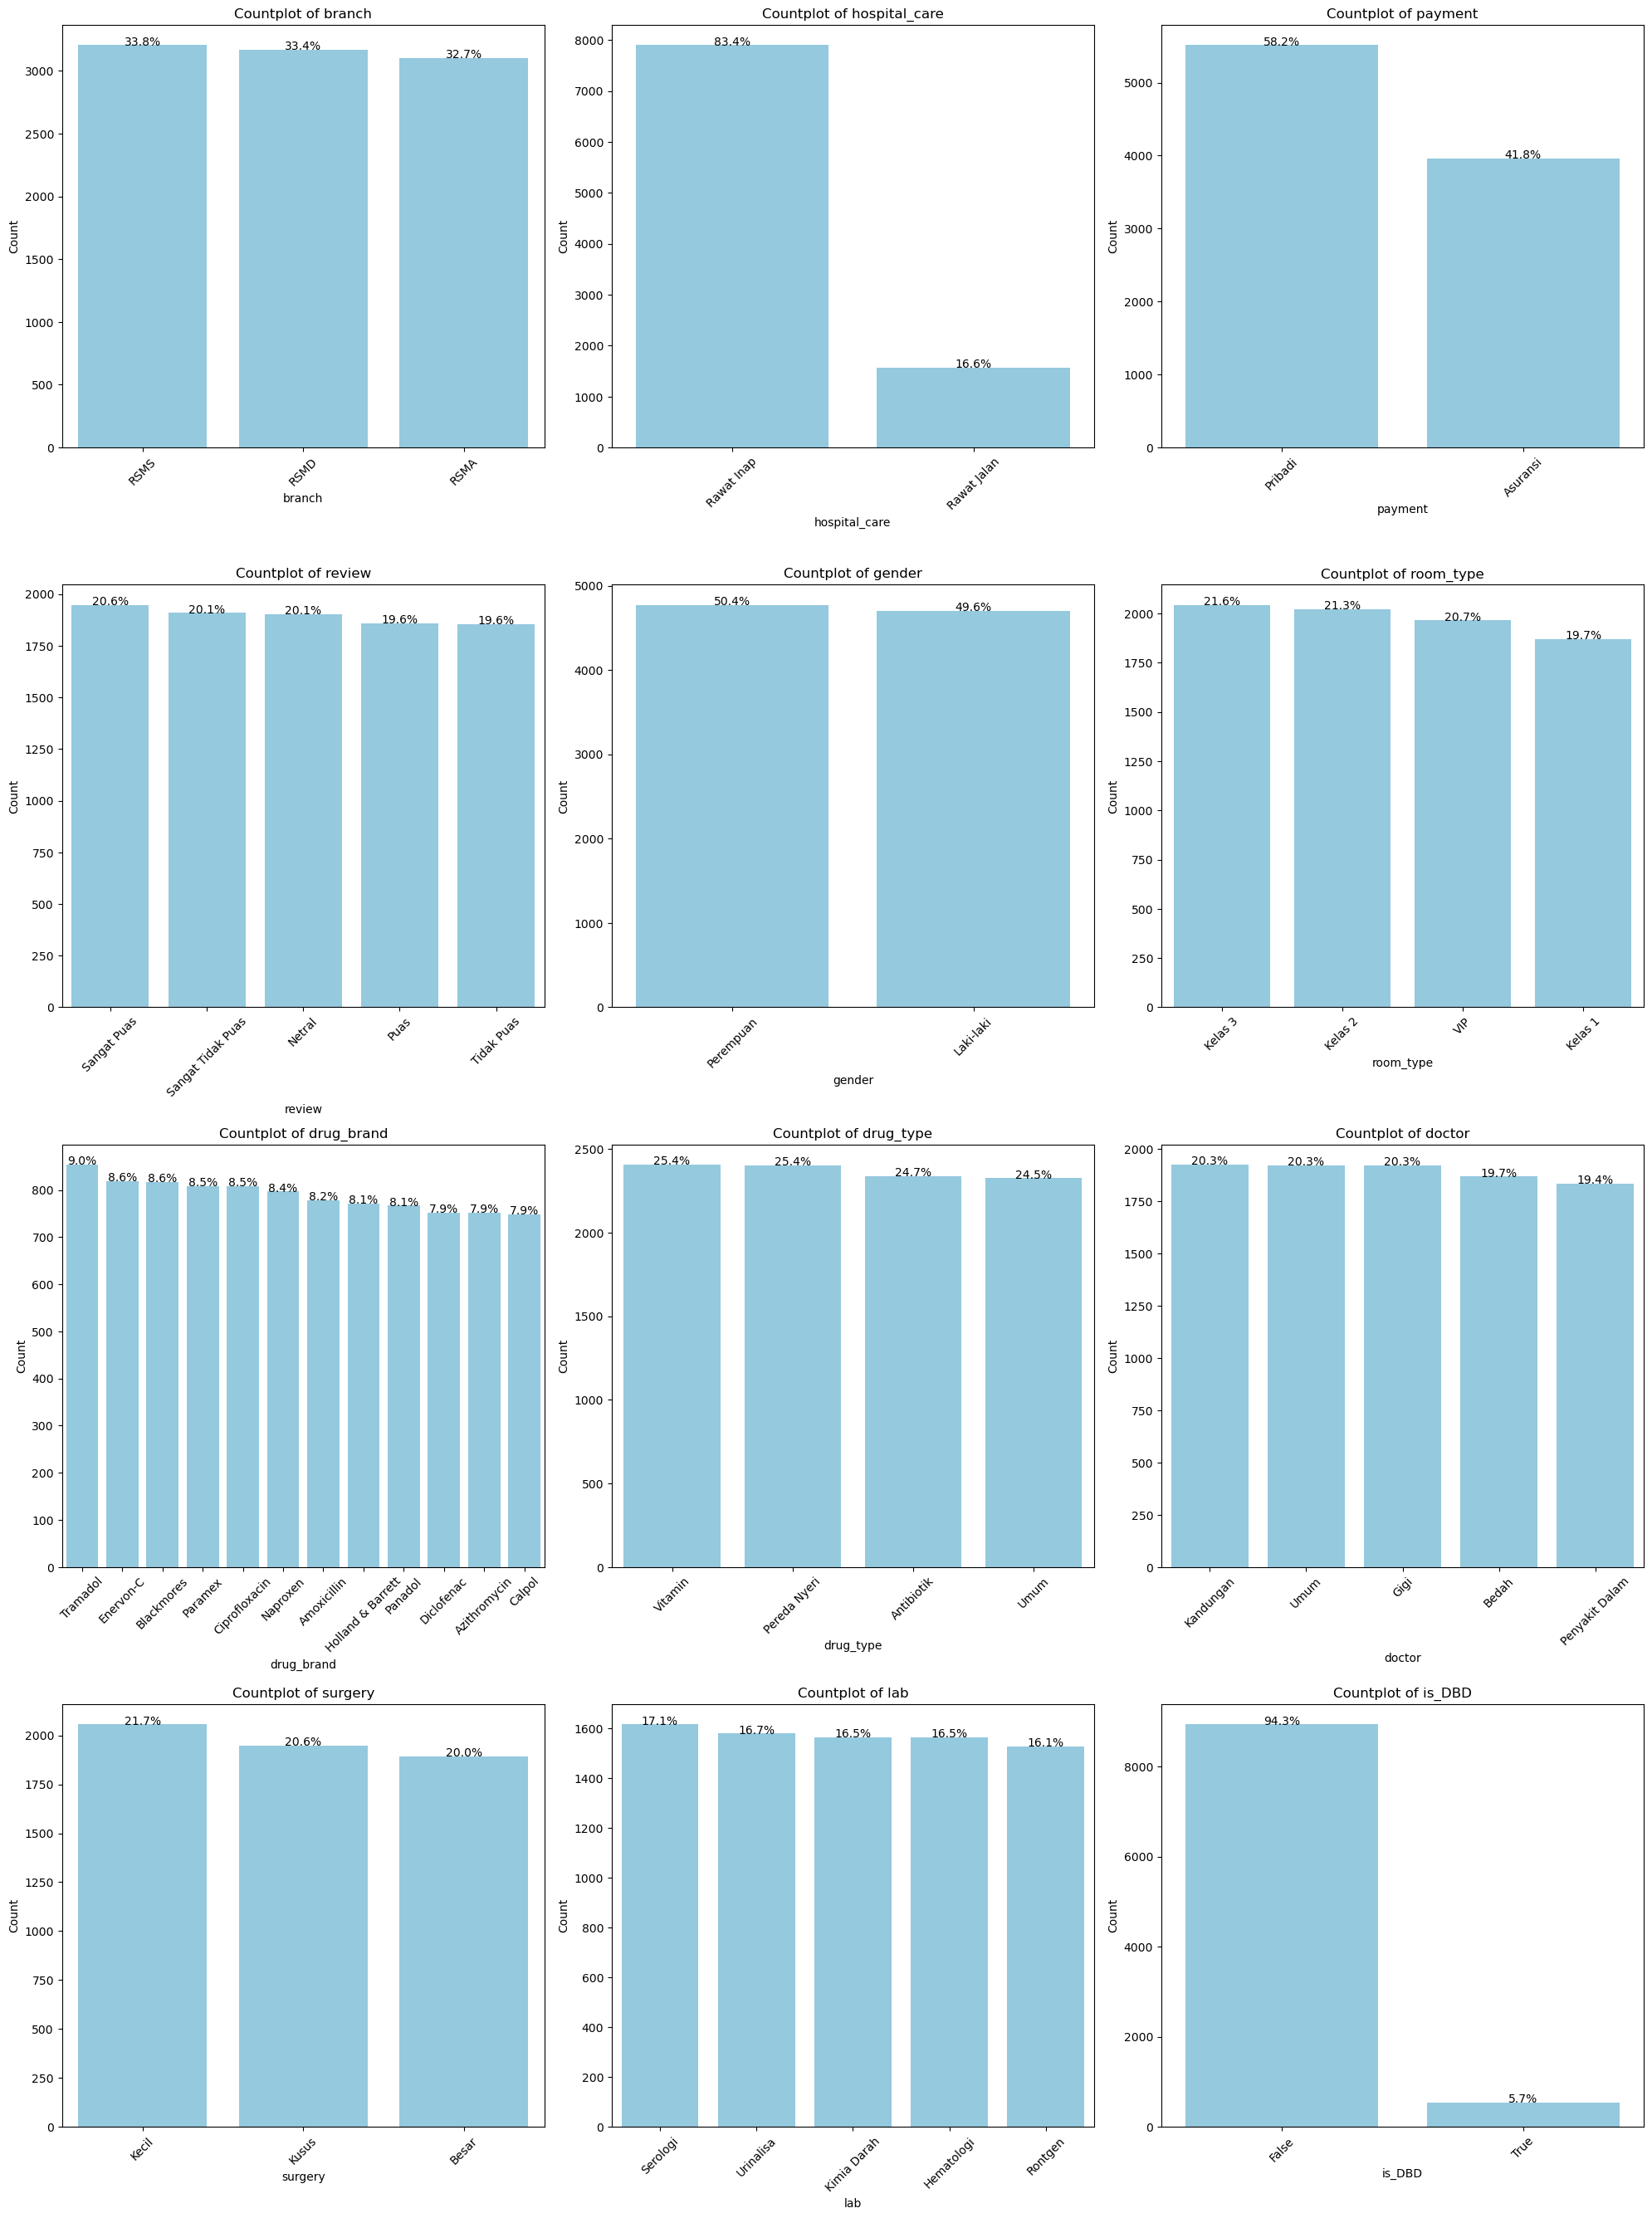

In [14]:
# List of categorical columns
cat_cols = [col for col in cats if col != 'patient_name']

# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*5))

# Loop through categorical features and plot bar charts
for i, feature in enumerate(cat_cols):
    ax = plt.subplot(grid[i])
    sns.countplot(data=df, x=feature, ax=ax, order=df[feature].value_counts().index, color='skyblue')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Calculate percentages and annotate bars
    total = float(len(df[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02
        ax.annotate(percentage, (x, y), ha='center')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical columns

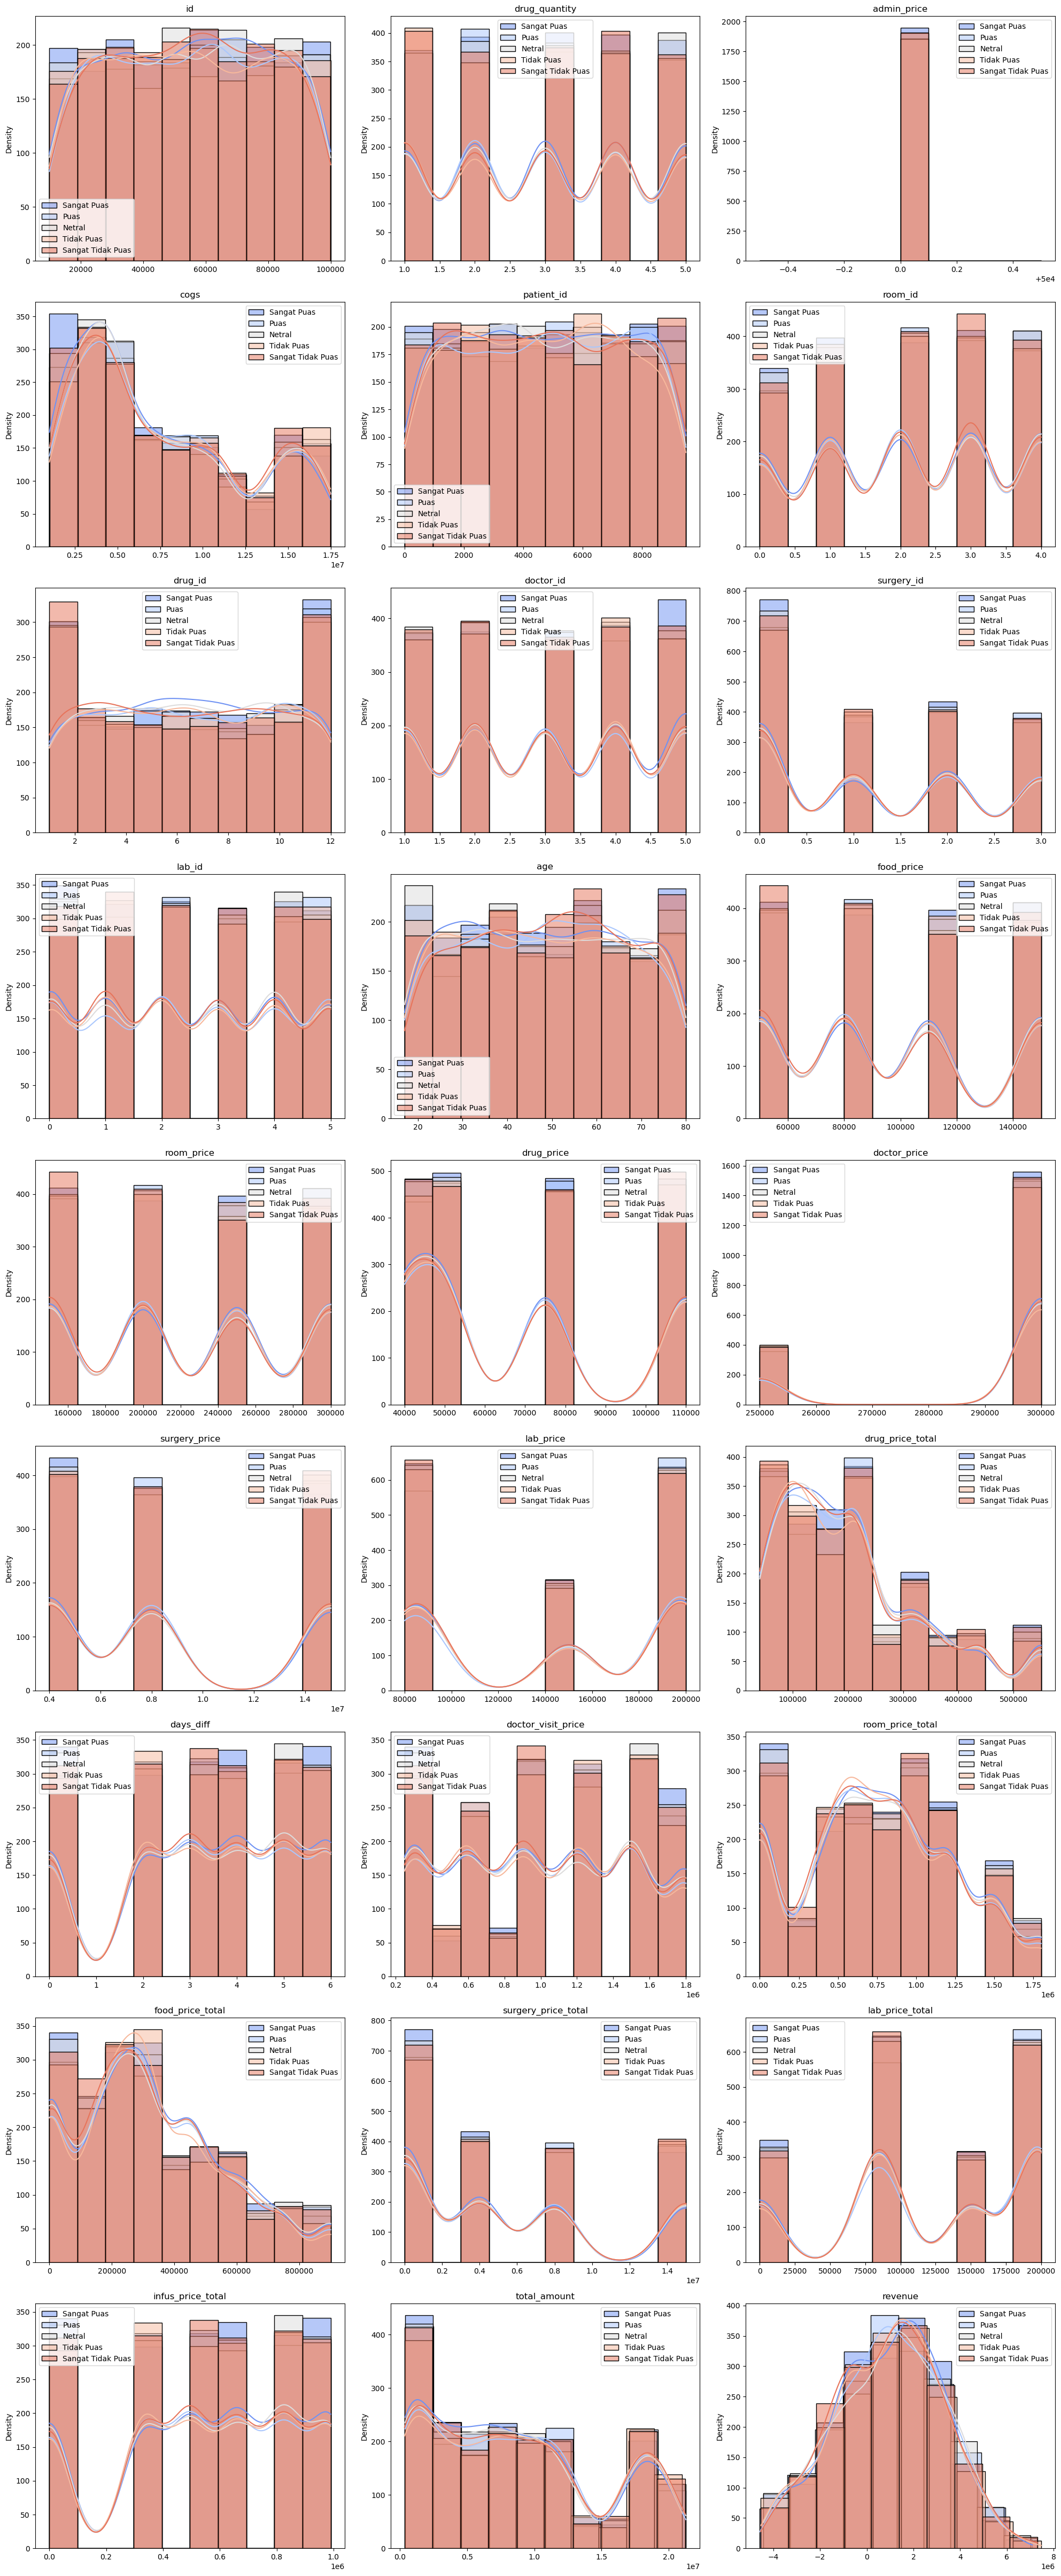

In [15]:
# num_cols = [col for col in nums if col != ['id', 'admin_price', 'patient_id', 'room_id',
#                                           'drug_id', 'doctor_id', 'surgery_id', 'lab_id']]
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

palette = sns.color_palette("coolwarm", n_colors=5)

for n, col in enumerate(nums):
    ax = plt.subplot(grid[n])
    for i, category in enumerate(["Sangat Puas", "Puas", "Netral", "Tidak Puas", "Sangat Tidak Puas"]):
        sns.histplot(df[col][df["review"] == category], bins=10, kde=True, label=category, color=palette[i], ax=ax)
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    ax.legend()

plt.tight_layout()
plt.show()

### Categorical columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


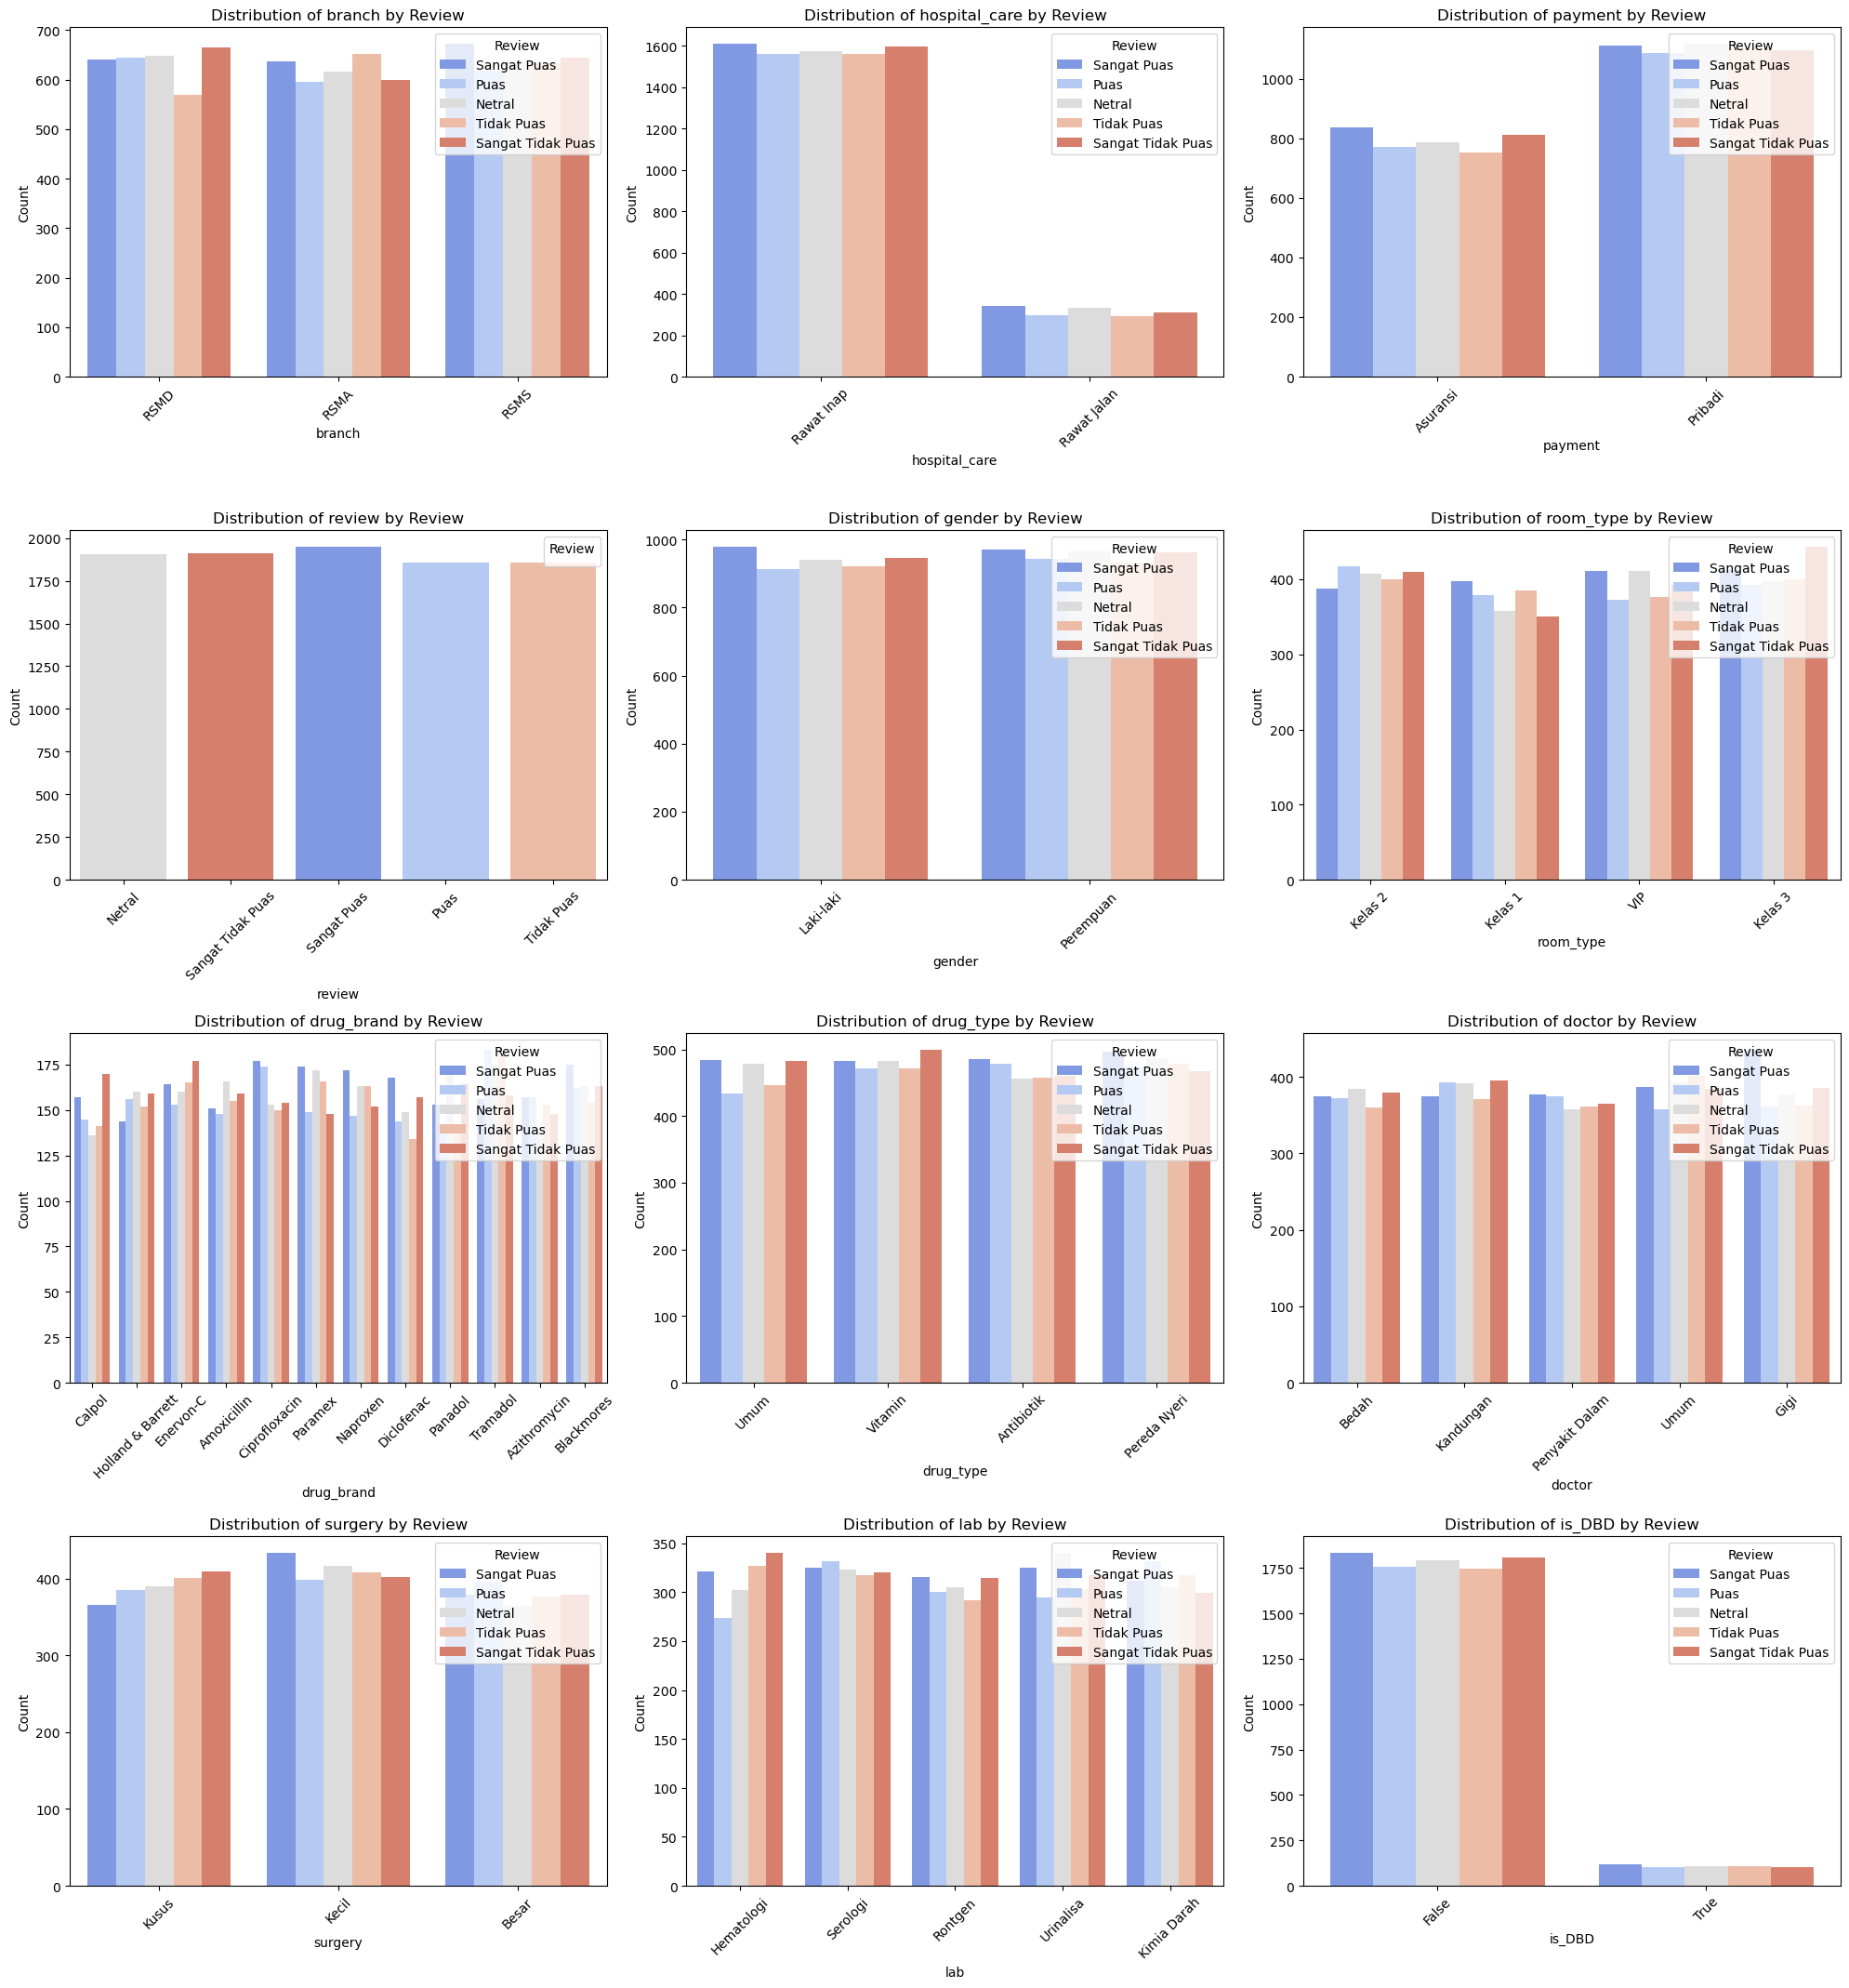

In [16]:
# List of categorical columns
cat_cols = [col for col in cats if col != 'patient_name']

# Define the order of 'review' categories
review_order = ["Sangat Puas", "Puas", "Netral", "Tidak Puas", "Sangat Tidak Puas"]

# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Plot stacked bar plots for each categorical column
for n, cat in enumerate(cat_cols):
    ax = plt.subplot(grid[n])
    sns.countplot(x=cat, hue='review', hue_order=review_order, data=df, palette='coolwarm', ax=ax)
    ax.set_title(f'Distribution of {cat} by Review')
    ax.set_xlabel(cat)
    ax.set_ylabel('Count')
    ax.legend(title='Review', loc='upper right')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical columns

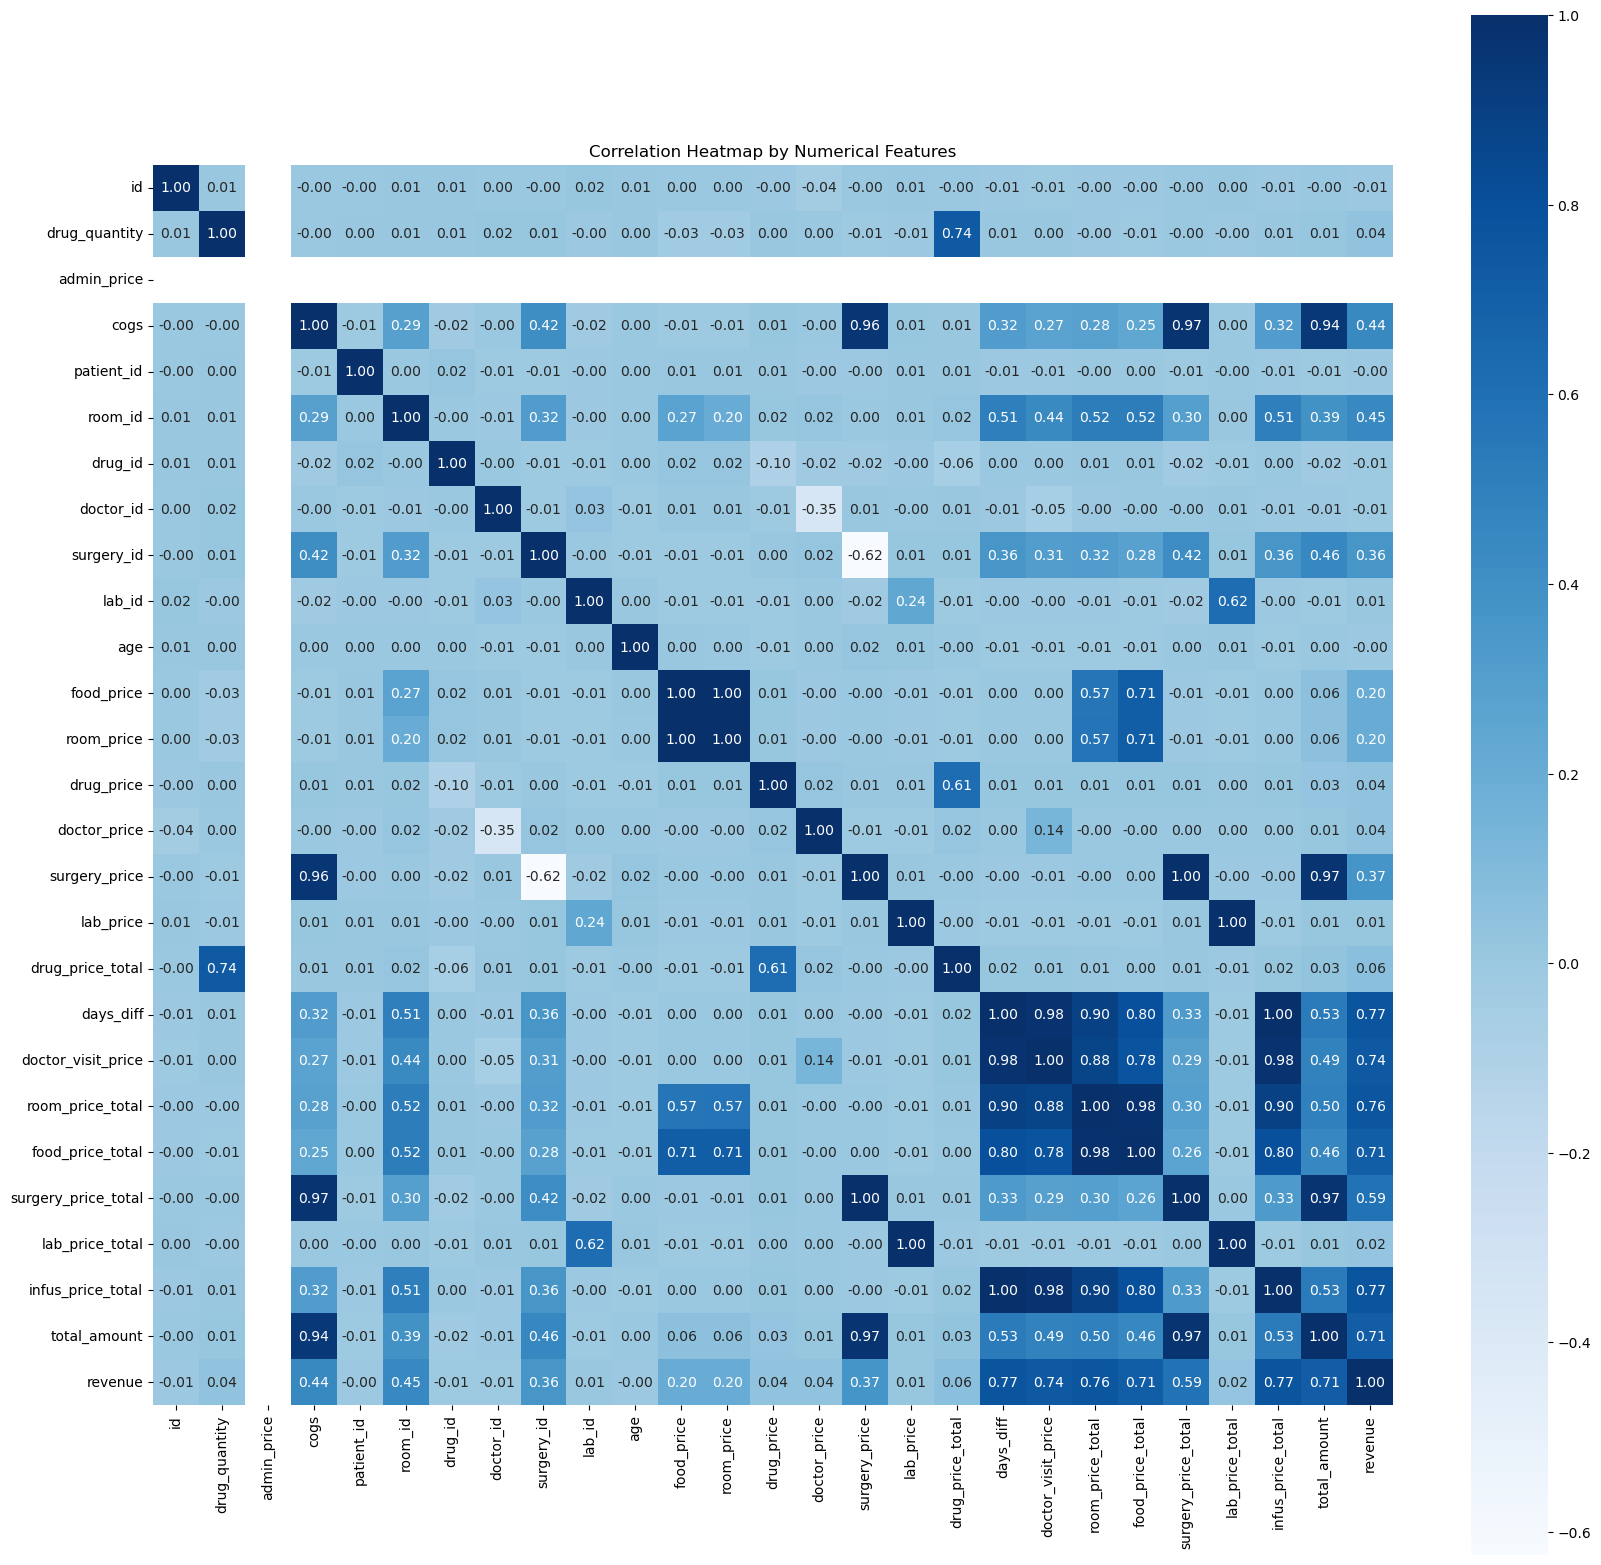

In [17]:
# Subset the DataFrame with only the numerical features
numerical_df = df[nums]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap by Numerical Features')
plt.show()

### Categorical columns

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table for each combination of categorical variable and the target variable
chi_square_results = {}

for column in cat_cols:
    contingency_table = pd.crosstab(df[column], df['review'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {'chi2': chi2, 'p-value': p}

# Display the results
for column, result in chi_square_results.items():
    print(f"Chi-square test for {column} vs {'review'}:")
    print(f"Chi-square value: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print('-' * 30)

Chi-square test for branch vs review:
Chi-square value: 11.723656747824727
P-value: 0.16396604103500598
------------------------------
Chi-square test for hospital_care vs review:
Chi-square value: 3.3377103400270594
P-value: 0.5029796510711806
------------------------------
Chi-square test for payment vs review:
Chi-square value: 2.772224805023633
P-value: 0.5966366539266257
------------------------------
Chi-square test for review vs review:
Chi-square value: 37896.0
P-value: 0.0
------------------------------
Chi-square test for gender vs review:
Chi-square value: 0.4557034619600759
P-value: 0.9776674975700324
------------------------------
Chi-square test for room_type vs review:
Chi-square value: 11.34263464187533
P-value: 0.4998053502352243
------------------------------
Chi-square test for drug_brand vs review:
Chi-square value: 32.868830793803255
P-value: 0.8910018801232452
------------------------------
Chi-square test for drug_type vs review:
Chi-square value: 5.0123095531746

In [19]:
column_to_drop = ['id', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'patient_name', 'created_at',
                 'admin_price', 'drug_price_total', 'doctor_visit_price', 'room_price_total', 'food_price_total',
                  'surgery_price_total', 'lab_price_total', 'infus_price_total', 'revenue', 'cogs']

## Data Cleansing

In [20]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Missing Values
id                        0
date_in                   0
date_out                  0
branch                    0
hospital_care             0
drug_quantity             0
admin_price               0
cogs                      0
payment                   0
review                    0
patient_id                0
room_id                   0
drug_id                   0
doctor_id                 0
surgery_id                0
lab_id                    0
patient_name              0
gender                    0
age                       0
room_type              1573
food_price             1573
room_price             1573
drug_brand                0
drug_type                 0
drug_price                0
doctor                    0
doctor_price              0
surgery                3573
surgery_price          3573
lab                    1620
lab_price              1620
drug_price_total          0
days_diff                 0
doctor_visit_price        0
room_price_total          0
food_

In [21]:
# Fill missing values in categorical columns
categorical_cols = ["room_type", "surgery", "lab"]
df[categorical_cols] = df[categorical_cols].fillna("Tidak Digunakan")

# Fill missing values in numerical columns
numerical_cols = ["food_price", "room_price", "surgery_price", "lab_price"]
df[numerical_cols] = df[numerical_cols].fillna(0)

In [22]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
id                     0
date_in                0
date_out               0
branch                 0
hospital_care          0
drug_quantity          0
admin_price            0
cogs                   0
payment                0
review                 0
patient_id             0
room_id                0
drug_id                0
doctor_id              0
surgery_id             0
lab_id                 0
patient_name           0
gender                 0
age                    0
room_type              0
food_price             0
room_price             0
drug_brand             0
drug_type              0
drug_price             0
doctor                 0
doctor_price           0
surgery                0
surgery_price          0
lab                    0
lab_price              0
drug_price_total       0
days_diff              0
doctor_visit_price     0
room_price_total       0
food_price_total       0
surgery_price_total    0
lab_price_total        0
infus_price_total      0
total_amou

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9474 non-null   int64         
 1   date_in              9474 non-null   datetime64[ns]
 2   date_out             9474 non-null   datetime64[ns]
 3   branch               9474 non-null   object        
 4   hospital_care        9474 non-null   object        
 5   drug_quantity        9474 non-null   int64         
 6   admin_price          9474 non-null   int64         
 7   cogs                 9474 non-null   int64         
 8   payment              9474 non-null   object        
 9   review               9474 non-null   object        
 10  patient_id           9474 non-null   int64         
 11  room_id              9474 non-null   int64         
 12  drug_id              9474 non-null   int64         
 13  doctor_id            9474 non-nul

In [25]:
# # Filtering Outliers using Z-score
# # Penjelasan: Filtering hanya dilakukan pada kolom
# # Kolom-kolom ini diharapkan menjadi fitur yang akan digunakan pada pemodelan dan dapat memprediksi 

# from scipy import stats

# print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# filtered_entries = np.array([True] * len(df))

# for col in ['drug_quantity','cogs','room_price','food_price','drug_price', 'doctor_price', 'surgery_price']:
#     zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

## Feature Engineering

In [26]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']

# Assign age groups to the data
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

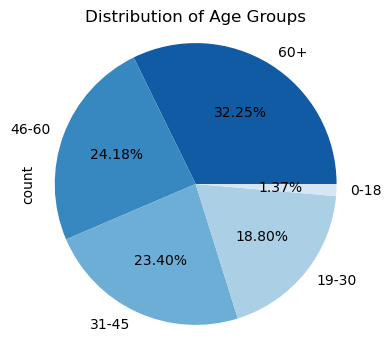

In [27]:
# Plot the pie chart
custom_palette = sns.color_palette('Blues_r', len(df['age_group'].unique()))
plt.figure(figsize=(4, 4))
df['age_group'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=custom_palette)
plt.title('Distribution of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


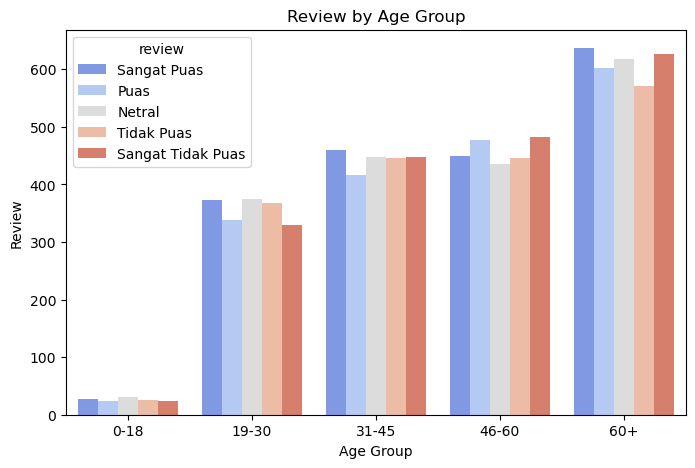

In [28]:
# Create a box plot
# Define the order of 'review' categories
review_order = ["Sangat Puas", "Puas", "Netral", "Tidak Puas", "Sangat Tidak Puas"]

plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', hue='review', hue_order=review_order, data=df, palette='coolwarm')
plt.title('Review by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Review')
plt.show()

In [29]:
df_copy = df
df_copy['date_in_year'] = df_copy['date_in'].dt.year
df_copy['date_in_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
9469    2023
9470    2023
9471    2023
9472    2023
9473    2023
Name: date_in_year, Length: 9474, dtype: int32

In [30]:
df_copy['date_in_month'] = df_copy['date_in'].dt.month
df_copy['date_in_month']

0        1
1        1
2        1
3        1
4        1
        ..
9469    12
9470    12
9471    12
9472    12
9473    12
Name: date_in_month, Length: 9474, dtype: int32

In [31]:
df_copy['date_out_year'] = df_copy['date_out'].dt.year
df_copy['date_out_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
9469    2024
9470    2024
9471    2024
9472    2024
9473    2024
Name: date_out_year, Length: 9474, dtype: int32

In [32]:
df_copy['date_out_month'] = df_copy['date_out'].dt.month
df_copy['date_out_month']

0       1
1       1
2       1
3       1
4       1
       ..
9469    1
9470    1
9471    1
9472    1
9473    1
Name: date_out_month, Length: 9474, dtype: int32

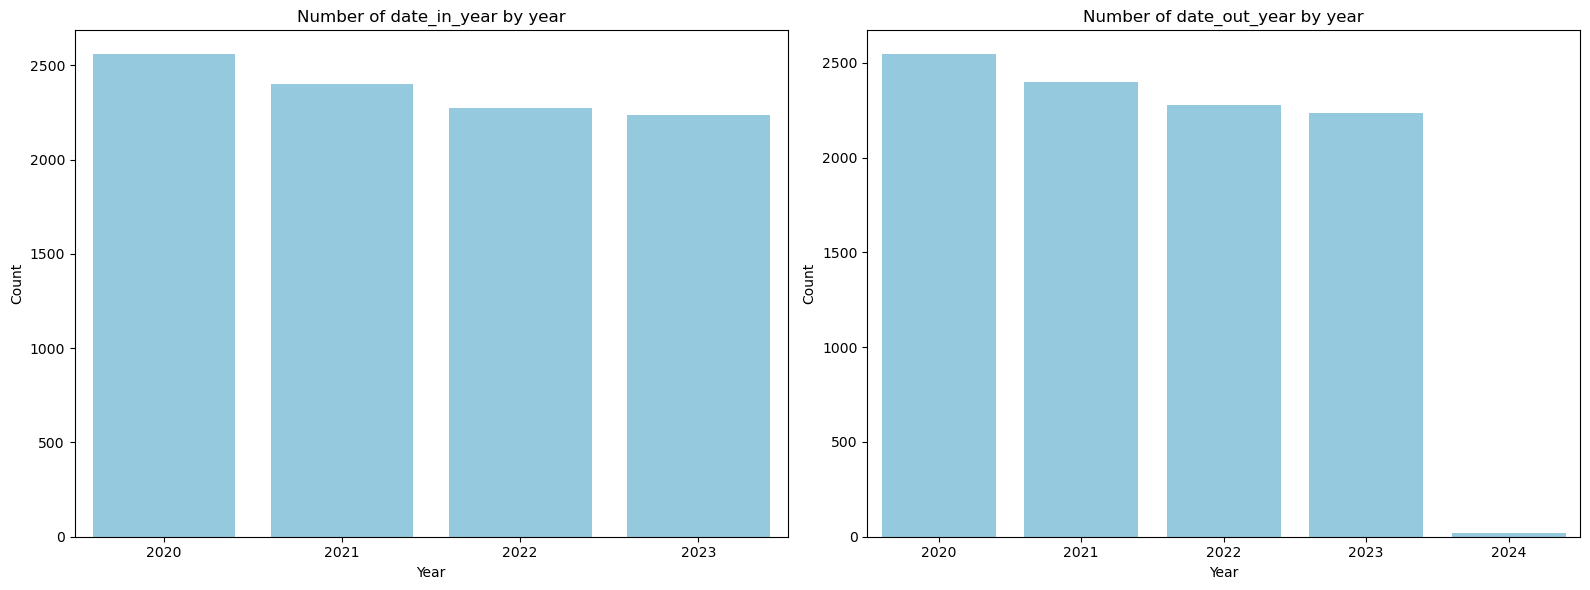

In [33]:
# List of columns to visualize
date_columns = ['date_in_year', 'date_out_year']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(date_columns), figsize=(16, 6))

# Loop through date_columns and plot countplots
for i, column in enumerate(date_columns):
    sns.countplot(x=df_copy[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Number of {column} by year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### label encoding untuk data ordinal

In [34]:
# label encode is_DBD
df['is_DBD'] = df['is_DBD'].astype(int)

# Label encode (mapping) age_group
age_mapping = {'0-18': 0, '19-30': 1, '31-45': 2, '46-60': 3, '60+': 4}
df['age_group'] = df['age_group'].replace(age_mapping).astype(int)

# Label encode (mapping) room_type
room_mapping = {'Tidak Digunakan': 0, 'Kelas 3': 1, 'Kelas 2': 2, 'Kelas 1': 3, 'VIP': 4}
df['room_type_encoded'] = df['room_type'].replace(room_mapping).astype(int)

# Label encode (mapping) surgery
surgery_mapping = {'Tidak Digunakan': 0, 'Kecil': 1, 'Besar': 2, 'Kusus': 3}
df['surgery_encoded'] = df['surgery'].replace(surgery_mapping).astype(int)

In [35]:
# Label encode (mapping) review
review_mapping = {'Sangat Tidak Puas': 0, 'Tidak Puas': 1, 'Netral': 2, 'Puas': 3, 'Sangat Puas': 4}
df['review'] = df['review'].replace(review_mapping).astype(int)

### One-hot encoding (data non-ordinal)

In [36]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['branch', 'hospital_care', 'payment', 'gender', 'drug_brand', 'drug_type', 'doctor', 'lab']

for col in onehot_cols:
    onehots = pd.get_dummies(df[col], prefix=col, dtype=int)  # Specify dtype=int to convert to integers
    df = df.join(onehots)
    df = df.drop(col, axis=1)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            9474 non-null   int64         
 1   date_in                       9474 non-null   datetime64[ns]
 2   date_out                      9474 non-null   datetime64[ns]
 3   drug_quantity                 9474 non-null   int64         
 4   admin_price                   9474 non-null   int64         
 5   cogs                          9474 non-null   int64         
 6   review                        9474 non-null   int32         
 7   patient_id                    9474 non-null   int64         
 8   room_id                       9474 non-null   int64         
 9   drug_id                       9474 non-null   int64         
 10  doctor_id                     9474 non-null   int64         
 11  surgery_id                    

In [38]:
correlation = df[['age', 'age_group', 'date_in_year', 'date_in_month', 'date_out_year', 'date_out_month']].corrwith(df['total_amount'])
correlation_sorted = correlation.sort_index()

print(correlation_sorted)

age               0.000259
age_group         0.000699
date_in_month    -0.011389
date_in_year     -0.008134
date_out_month   -0.016274
date_out_year    -0.005004
dtype: float64


In [39]:
column_to_drop = column_to_drop + ['date_in', 'date_out', 'age', 
                                   'hospital_care_Rawat Jalan', 'gender_Perempuan', 'payment_Pribadi',
                                   'room_type', 'surgery',
                                   'date_in_month', 'date_in_year', 'date_out_year', 'date_out_month',
                                  ]

In [40]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# calculate correlation and print correlation_sorted
correlation = df.select_dtypes(include=[np.number]).corrwith(df['review'])
#correlation_sorted = correlation.sort_index()
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

review                          1.000000
cogs                            0.025098
surgery_price                   0.021650
surgery_price_total             0.021650
lab_Hematologi                  0.020877
surgery_encoded                 0.020487
total_amount                    0.018024
drug_brand_Ciprofloxacin        0.016775
doctor_Gigi                     0.014882
lab_Tidak Digunakan             0.014625
drug_id                         0.012361
drug_brand_Enervon-C            0.011892
room_id                         0.011873
drug_quantity                   0.010201
doctor_price                    0.009867
doctor_Umum                     0.009867
age                             0.009451
hospital_care_Rawat Jalan       0.009290
hospital_care_Rawat Inap        0.009290
drug_type_Vitamin               0.008969
doctor_id                       0.008920
drug_brand_Holland & Barrett    0.008852
food_price_total                0.008717
date_in_month                   0.008624
drug_type_Antibi

In [41]:
column_to_drop = column_to_drop + ['doctor_price', 'drug_price', 'food_price', 'lab_price', 'room_price', 'surgery_price']

## Feature Selection

In [42]:
final_df = df.drop(column_to_drop, axis=1)
final_df.head()

drug_quantity  review  days_diff  total_amount  is_DBD  age_group  \
0              4       2        3.0      17535000       0          4   
1              1       0        5.0      19485000       0          3   
2              5       4        0.0        990000       0          2   
3              2       2        5.0       8925000       0          2   
4              3       0        2.0       2305000       0          2   

   room_type_encoded  surgery_encoded  branch_RSMA  branch_RSMD  ...  \
0                  2                3            0            1  ...   
1                  3                3            1            0  ...   
2                  0                0            0            1  ...   
3                  4                1            1            0  ...   
4                  4                0            0            0  ...   

   doctor_Gigi  doctor_Kandungan  doctor_Penyakit Dalam  doctor_Umum  \
0            0                 0                      0            0   
1            0                 0                      0            0   
2            0                 0                      0            0   
3            0                 0                      0            0   
4            0                 1                      0            0   

   lab_Hematologi  lab_Kimia Darah  lab_Rontgen  lab_Serologi  \
0               1                0            0             0   
1               0                0            0             1   
2               1                0            0             0   
3               0                0            1             0   
4               0                0            0             1   

   lab_Tidak Digunakan  lab_Urinalisa  
0                    0              0  
1                    0              0  
2                    0              0  
3                    0              0  
4                    0              0  

[5 rows x 41 columns]

In [43]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# calculate correlation and print correlation_sorted
correlation = final_df.corrwith(df['review'])
#correlation_sorted = correlation.sort_index()
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

review                          1.000000
lab_Hematologi                  0.020877
surgery_encoded                 0.020487
total_amount                    0.018024
drug_brand_Ciprofloxacin        0.016775
doctor_Gigi                     0.014882
lab_Tidak Digunakan             0.014625
drug_brand_Enervon-C            0.011892
drug_quantity                   0.010201
doctor_Umum                     0.009867
hospital_care_Rawat Inap        0.009290
drug_type_Vitamin               0.008969
drug_brand_Holland & Barrett    0.008852
drug_type_Antibiotik            0.008439
drug_brand_Amoxicillin          0.008018
drug_brand_Calpol               0.007817
drug_brand_Panadol              0.007775
drug_brand_Paramex              0.007462
drug_brand_Diclofenac           0.007025
drug_brand_Blackmores           0.006618
doctor_Kandungan                0.006360
drug_type_Pereda Nyeri          0.005539
lab_Kimia Darah                 0.005523
room_type_encoded               0.005103
drug_type_Umum  

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate features and target
X = final_df.drop('review', axis=1)
y = final_df['review']

In [45]:
# Initialize the MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

In [46]:
# Check for class imbalance
final_df['review'].value_counts(normalize=True)

review
4    0.205615
0    0.201499
2    0.200971
3    0.196116
1    0.195799
Name: proportion, dtype: float64

## Machine Learning Modeling and Evaluation

In [47]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape

((7579, 40), (1895, 40))

In [49]:
# Import Classifier library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

class_names = ['Sangat Tidak Puas (0)', 'Tidak Puas (1)', 'Netral (2)', 'Puas (3)', 'Sangat Puas (4)']
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

-------------------- Logisitic Regression ----------------------
Training Accuracy: 23.25%
Train Recall (weighted): 23.25%
Train F1-score (weighted): 22.78%
Cross Validation (CV=5) score: 19.77 % accuracy score
Test Recall (weighted): 18.05%
Test F1-score (weighted): 17.77%

Classification Report for Logisitic Regression (Test Data):
              precision    recall  f1-score   support

           0     0.1691    0.1517    0.1599       389
           1     0.2073    0.1318    0.1611       387
           2     0.1432    0.1723    0.1564       354
           3     0.1881    0.1645    0.1755       383
           4     0.2004    0.2827    0.2345       382

    accuracy                         0.1805      1895
   macro avg     0.1816    0.1806    0.1775      1895
weighted avg     0.1822    0.1805    0.1777      1895

Confusion Matrix for Logisitic Regression (Test Data):
[[ 59  45  98  74 113]
 [ 79  51  94  61 102]
 [ 72  47  61  59 115]
 [ 70  57  92  63 101]
 [ 69  46  81  78 108]]



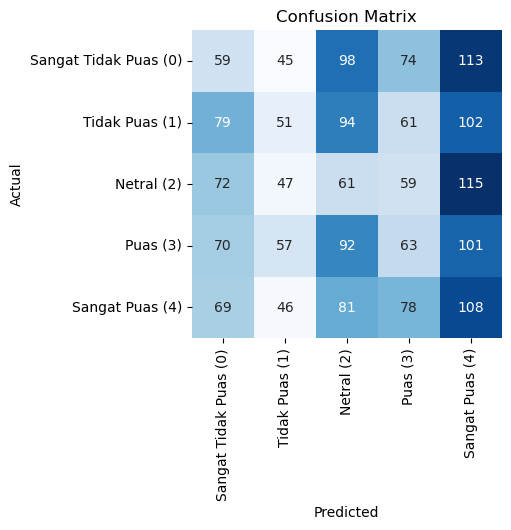

-------------------- KNearest Classifier ----------------------
Training Accuracy: 45.81%
Train Recall (weighted): 45.81%
Train F1-score (weighted): 45.51%
Cross Validation (CV=5) score: 20.02 % accuracy score
Test Recall (weighted): 20.16%
Test F1-score (weighted): 19.96%

Classification Report for KNearest Classifier (Test Data):
              precision    recall  f1-score   support

           0     0.2080    0.2802    0.2388       389
           1     0.2109    0.2196    0.2152       387
           2     0.1684    0.1836    0.1757       354
           3     0.1914    0.1514    0.1691       383
           4     0.2330    0.1702    0.1967       382

    accuracy                         0.2016      1895
   macro avg     0.2023    0.2010    0.1991      1895
weighted avg     0.2029    0.2016    0.1996      1895

Confusion Matrix for KNearest Classifier (Test Data):
[[109  87  83  57  53]
 [108  85  80  67  47]
 [ 90  76  65  60  63]
 [106  84  84  58  51]
 [111  71  74  61  65]]



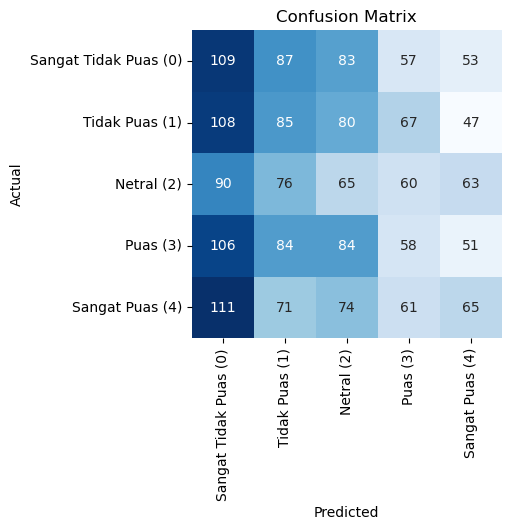

-------------------- Support Vector Classifier ----------------------
Training Accuracy: 39.98%
Train Recall (weighted): 39.98%
Train F1-score (weighted): 39.78%
Cross Validation (CV=5) score: 21.16 % accuracy score
Test Recall (weighted): 19.47%
Test F1-score (weighted): 19.53%

Classification Report for Support Vector Classifier (Test Data):
              precision    recall  f1-score   support

           0     0.1947    0.1877    0.1911       389
           1     0.2526    0.1912    0.2176       387
           2     0.1640    0.2062    0.1827       354
           3     0.1895    0.1697    0.1791       383
           4     0.1913    0.2199    0.2046       382

    accuracy                         0.1947      1895
   macro avg     0.1984    0.1949    0.1950      1895
weighted avg     0.1991    0.1947    0.1953      1895

Confusion Matrix for Support Vector Classifier (Test Data):
[[ 73  49 100  74  93]
 [ 80  74  90  62  81]
 [ 73  51  73  68  89]
 [ 65  71  90  65  92]
 [ 84  48  92

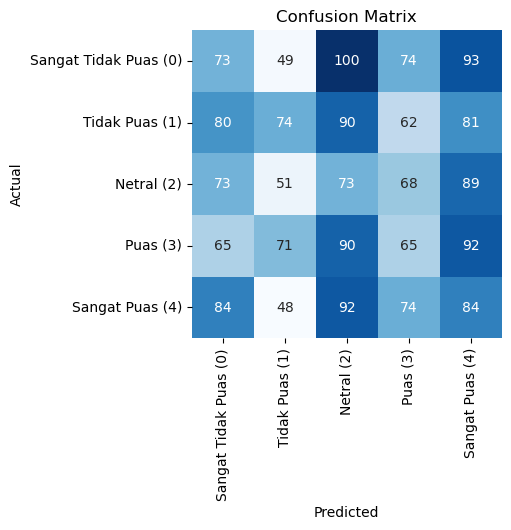

-------------------- DecisionTree Classifier ----------------------
Training Accuracy: 99.79%
Train Recall (weighted): 99.79%
Train F1-score (weighted): 99.79%
Cross Validation (CV=5) score: 20.49 % accuracy score
Test Recall (weighted): 18.94%
Test F1-score (weighted): 18.96%

Classification Report for DecisionTree Classifier (Test Data):
              precision    recall  f1-score   support

           0     0.1939    0.1954    0.1946       389
           1     0.2181    0.2119    0.2149       387
           2     0.1633    0.1836    0.1729       354
           3     0.1934    0.1828    0.1879       383
           4     0.1798    0.1728    0.1762       382

    accuracy                         0.1894      1895
   macro avg     0.1897    0.1893    0.1893      1895
weighted avg     0.1902    0.1894    0.1896      1895

Confusion Matrix for DecisionTree Classifier (Test Data):
[[ 76  73  70  88  82]
 [ 82  82  82  78  63]
 [ 86  67  65  67  69]
 [ 77  74  75  70  87]
 [ 71  80 106  59  

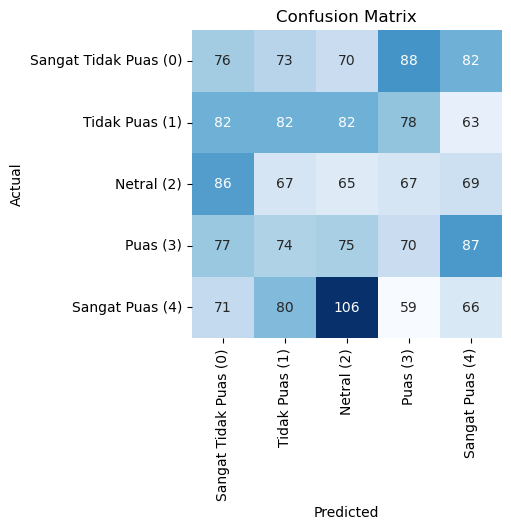

-------------------- Random Forest Classifier ----------------------
Training Accuracy: 99.79%
Train Recall (weighted): 99.79%
Train F1-score (weighted): 99.79%
Cross Validation (CV=5) score: 20.66 % accuracy score
Test Recall (weighted): 18.68%
Test F1-score (weighted): 18.71%

Classification Report for Random Forest Classifier (Test Data):
              precision    recall  f1-score   support

           0     0.2061    0.2082    0.2072       389
           1     0.1956    0.1835    0.1893       387
           2     0.1449    0.1695    0.1563       354
           3     0.1676    0.1540    0.1605       383
           4     0.2225    0.2173    0.2199       382

    accuracy                         0.1868      1895
   macro avg     0.1874    0.1865    0.1866      1895
weighted avg     0.1881    0.1868    0.1871      1895

Confusion Matrix for Random Forest Classifier (Test Data):
[[ 81  69  78  83  78]
 [ 87  71  86  73  70]
 [ 69  87  60  64  74]
 [ 76  75 105  59  68]
 [ 80  61  85  7

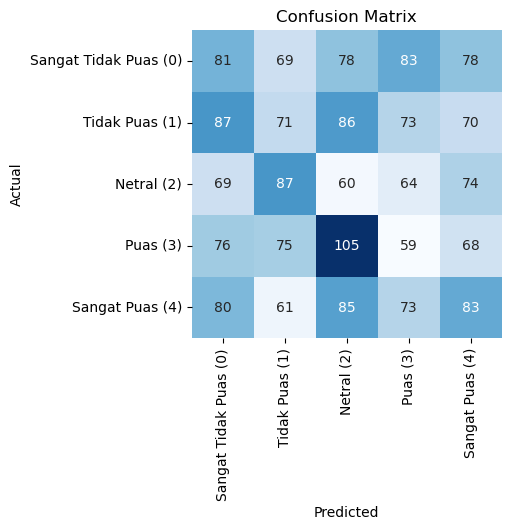

-------------------- AdaBoost Classifier ----------------------
Training Accuracy: 23.60%
Train Recall (weighted): 23.6%
Train F1-score (weighted): 23.36%
Cross Validation (CV=5) score: 20.03 % accuracy score
Test Recall (weighted): 18.68%
Test F1-score (weighted): 18.66%

Classification Report for AdaBoost Classifier (Test Data):
              precision    recall  f1-score   support

           0     0.1734    0.1440    0.1573       389
           1     0.2346    0.1964    0.2138       387
           2     0.1531    0.1864    0.1682       354
           3     0.1856    0.1749    0.1801       383
           4     0.1952    0.2330    0.2124       382

    accuracy                         0.1868      1895
   macro avg     0.1884    0.1869    0.1864      1895
weighted avg     0.1890    0.1868    0.1866      1895

Confusion Matrix for AdaBoost Classifier (Test Data):
[[ 56  63  96  82  92]
 [ 63  76  89  70  89]
 [ 67  57  66  61 103]
 [ 70  69  94  67  83]
 [ 67  59  86  81  89]]



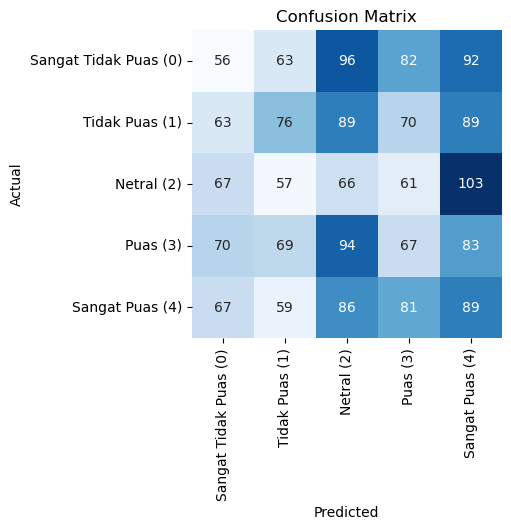

-------------------- XGBoost Classifier ----------------------
Training Accuracy: 87.44%
Train Recall (weighted): 87.44%
Train F1-score (weighted): 87.43%
Cross Validation (CV=5) score: 19.66 % accuracy score
Test Recall (weighted): 19.26%
Test F1-score (weighted): 19.29%

Classification Report for XGBoost Classifier (Test Data):
              precision    recall  f1-score   support

           0     0.2185    0.2005    0.2091       389
           1     0.2040    0.1860    0.1946       387
           2     0.1726    0.1921    0.1818       354
           3     0.1891    0.1906    0.1899       383
           4     0.1827    0.1937    0.1881       382

    accuracy                         0.1926      1895
   macro avg     0.1934    0.1926    0.1927      1895
weighted avg     0.1938    0.1926    0.1929      1895

Confusion Matrix for XGBoost Classifier (Test Data):
[[78 64 81 96 70]
 [77 72 79 72 87]
 [67 70 68 62 87]
 [63 75 85 73 87]
 [72 72 81 83 74]]



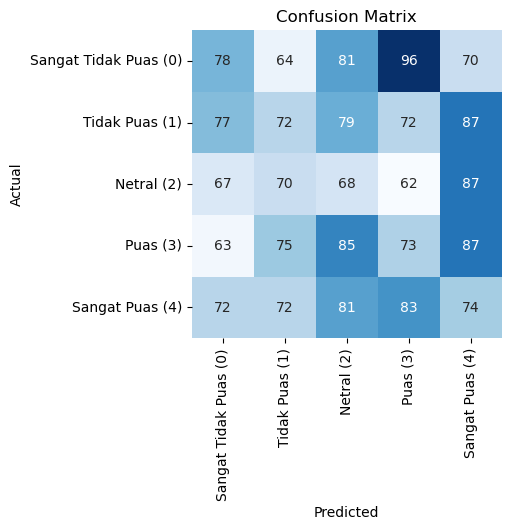

In [50]:
# Implementasikan pada beberapa algoritma klasifikasi

models = {
    "Logisitic Regression": LogisticRegression(random_state=42),
    "KNearest Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=42),
    "DecisionTree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42)
}

# Loop through the models
for model_name, model in models.items():
    # Pelatihan model pada data train
    model.fit(X_train, y_train)

    # Prediksi pada data train
    y_pred_train = model.predict(X_train)
    
    # Hitung training accuracy
    training_accuracy = accuracy_score(y_train, y_pred_train)
    print("--------------------",model_name, "----------------------")
    print("Training Accuracy: {:.2f}%".format(training_accuracy * 100))
    
    # Recall & F1-score train data
    recall_weighted_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_weighted_train = f1_score(y_train, y_pred_train, average='weighted')
    print(f'Train Recall (weighted): {round(recall_weighted_train * 100, 2)}%')
    print(f'Train F1-score (weighted): {round(f1_weighted_train * 100, 2)}%')
    
    # Cross-validation pada data pelatihan
    training_cv_score = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross Validation (CV=5) score:", round(training_cv_score.mean() * 100, 2), "% accuracy score")

    # Prediksi pada test data
    y_pred_test = model.predict(X_test)
    
    # Recall & F1-score test data
    recall_weighted = recall_score(y_test, y_pred_test, average='weighted')
    f1_weighted = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Test Recall (weighted): {round(recall_weighted * 100, 2)}%')
    print(f'Test F1-score (weighted): {round(f1_weighted * 100, 2)}%')
    
    # Laporan Klasifikasi pada test data
    test_report = classification_report(y_test, y_pred_test, digits=4)
    print(f'\nClassification Report for {model_name} (Test Data):\n{test_report}')
    
    # Confusion matrix pada test data
    confusion = confusion_matrix(y_test, y_pred_test)
    print(f'Confusion Matrix for {model_name} (Test Data):\n{confusion}\n')
    plot_confusion_matrix(confusion, class_names)

## Hyperparameter Tuning Random Search

## Deployment